## 1. Loading libraries, dataset and cleaning the data

### 1.1 Connecting to google drive and loading libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pandas.api.types import CategoricalDtype
warnings.filterwarnings("ignore")

### 1.2 Loading Datasets

In [3]:
# Loading data as pandas df
trainFilePath = "/content/drive/MyDrive/Training_Data.csv"
testFilePath = "/content/drive/MyDrive/Test_Data.csv"

trainDataDF = pd.read_csv(trainFilePath)
testDataDF = pd.read_csv(testFilePath)

display(trainDataDF.head(5))
display(testDataDF.head(5))

,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
0,1,19,M,7,0,0,0,0,0,0,No
1,2,24,F,59,0,0,0,0,0,0,No
2,3,4,F,43,0,0,0,0,0,0,No
3,4,38,M,66,0,0,0,0,0,1,No
4,5,46,F,98,0,0,0,0,0,1,No


,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder
0,1,5,M,28,0,0,0,0,0,1
1,2,62,F,9,1,0,1,0,0,0
2,3,4,F,73,0,0,0,0,0,1
3,4,33,M,117,0,0,0,0,0,0
4,5,38,M,8,0,0,0,0,0,1


### 1.3 Data cleaning
Label encoding the categorical values of gender and adherence

In [4]:
# converting adherence and gender variables to numerical types
gender_mapping = {"M": 1, "F": 0}
trainDataDF["Gender"] = trainDataDF["Gender"].map(gender_mapping).fillna(-1)

adherence_mapping = {"No": 0, "Yes": 1}
trainDataDF["Adherence"] = trainDataDF["Adherence"].map(adherence_mapping).fillna(-1)
# Adherence is the target variable, hence it is not present in the test dataset

# converting gender variable to numerical types using the same mapping that has been used for training data
testDataDF["Gender"] = testDataDF["Gender"].map(gender_mapping).fillna(-1)

In [5]:
print("-----------Describe training data-----------")
print("shape of the training dataset", trainDataDF.shape)
display(trainDataDF.describe())
print("\n\n-----------Describe test data-----------")
print("shape of the testing dataset", testDataDF.shape)
display(testDataDF.describe())

-----------Describe training data-----------
shape of the training dataset (180212, 11)


,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder,Adherence
count,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000,180212.000000
mean,90106.500000,37.795363,0.331687,54.668485,0.078524,0.025043,0.216512,0.052566,0.000338,0.573968,0.301811
std,52022.867693,22.852072,0.470821,35.752491,0.268995,0.156255,0.411868,0.223166,0.018395,0.499824,0.459045
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45053.750000,19.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,90106.500000,38.000000,0.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,135159.250000,56.000000,1.000000,86.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,180212.000000,113.000000,1.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000




-----------Describe test data-----------
shape of the testing dataset (119788, 10)


,patient_id,Age,Gender,Prescription_period,Diabetes,Alcoholism,HyperTension,Smokes,Tuberculosis,Sms_Reminder
count,119788.00000,119788.000000,119788.000000,119788.000000,119788.000000,119788.000000,119788.000000,119788.000000,119788.000000,119788.000000
mean,59894.50000,37.827111,0.331594,54.613417,0.077128,0.024961,0.214955,0.052075,0.000618,0.574482
std,34579.96136,22.744067,0.470788,35.766258,0.266795,0.156006,0.410793,0.222180,0.024847,0.499831
min,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29947.75000,19.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59894.50000,38.000000,0.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,89841.25000,56.000000,1.000000,86.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,119788.00000,113.000000,1.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


**Points to note:**<br>
1. Age ranges from 0 to 113 yrs (strange as Age cannot be 0, one possibility is that they are babies)<br>
2. Prescription_period ranges from 1 to 120 days
3. None of the variables provided have null or missing values.
4. Based on above descibe functions, it seems that both the datasets follow same distribution for all the variables except for Tuberculosis.
5. The test data has ~2 times the number of TB patienst than training data

## 2. EDA (Exploratory Data Analysis)

We will try to explore the different features present in the data and see if we can find some patterns of anomalies

### 2.1 Age

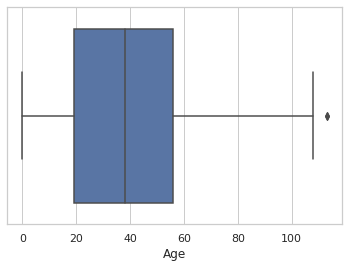

In [6]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=trainDataDF["Age"])

Majority of the Age group is concentrated in the range 18-57

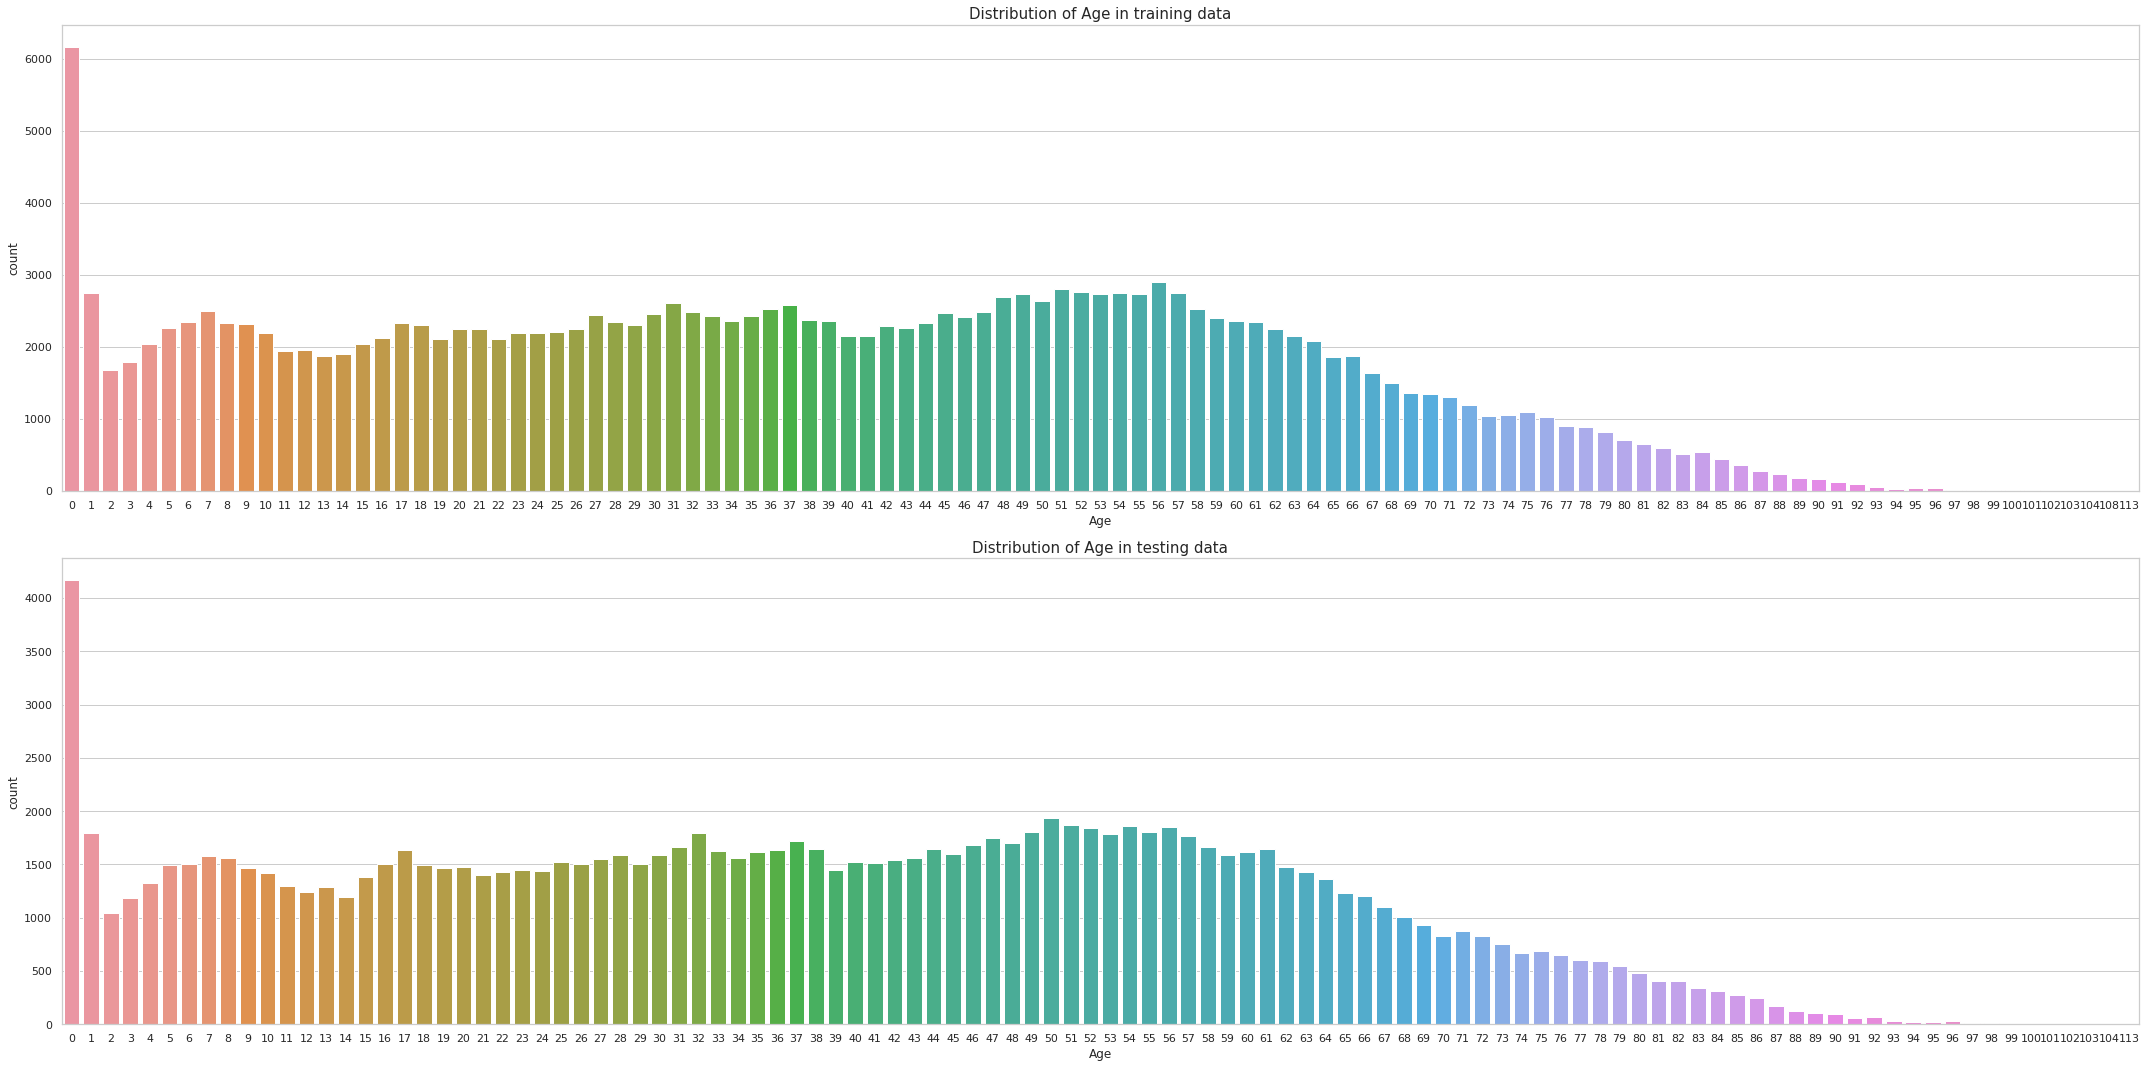

In [7]:
# Checking the distribution of values in Age feature in training data
data = trainDataDF.copy()
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(30, 15), squeeze=True, 
                       gridspec_kw = {'height_ratios':[1,1]})
# plt.figure(figsize=(30,10))
axes[0].set_title("Distribution of Age in training data",fontsize=15)
sns.countplot(data['Age'], ax=axes[0])

# Checking the distribution of values in Age feature in test data
data = testDataDF.copy()
axes[1].set_title("Distribution of Age in testing data",fontsize=15)
sns.countplot(data['Age'], ax=axes[1])

fig.tight_layout()
plt.show()

In [8]:
print("No of patients with age=0 in training dataset:", len(trainDataDF["Age"][trainDataDF["Age"]==0]))
print("No of patients with age=0 in test dataset:", len(testDataDF["Age"][testDataDF["Age"]==0]))

No of patients with age=0 in training dataset: 6167
No of patients with age=0 in test dataset: 4165


Both train and test datasets have silimar distribution of age<br>
Looking at this age distribution, large counts at Age = 0 looks like a data anomaly. <br>
Need to explore the data cut with Age = 0 in detail We will balance the data later for age = 0 and 1, if it not a anomaly

### 2.2 Prescription Period

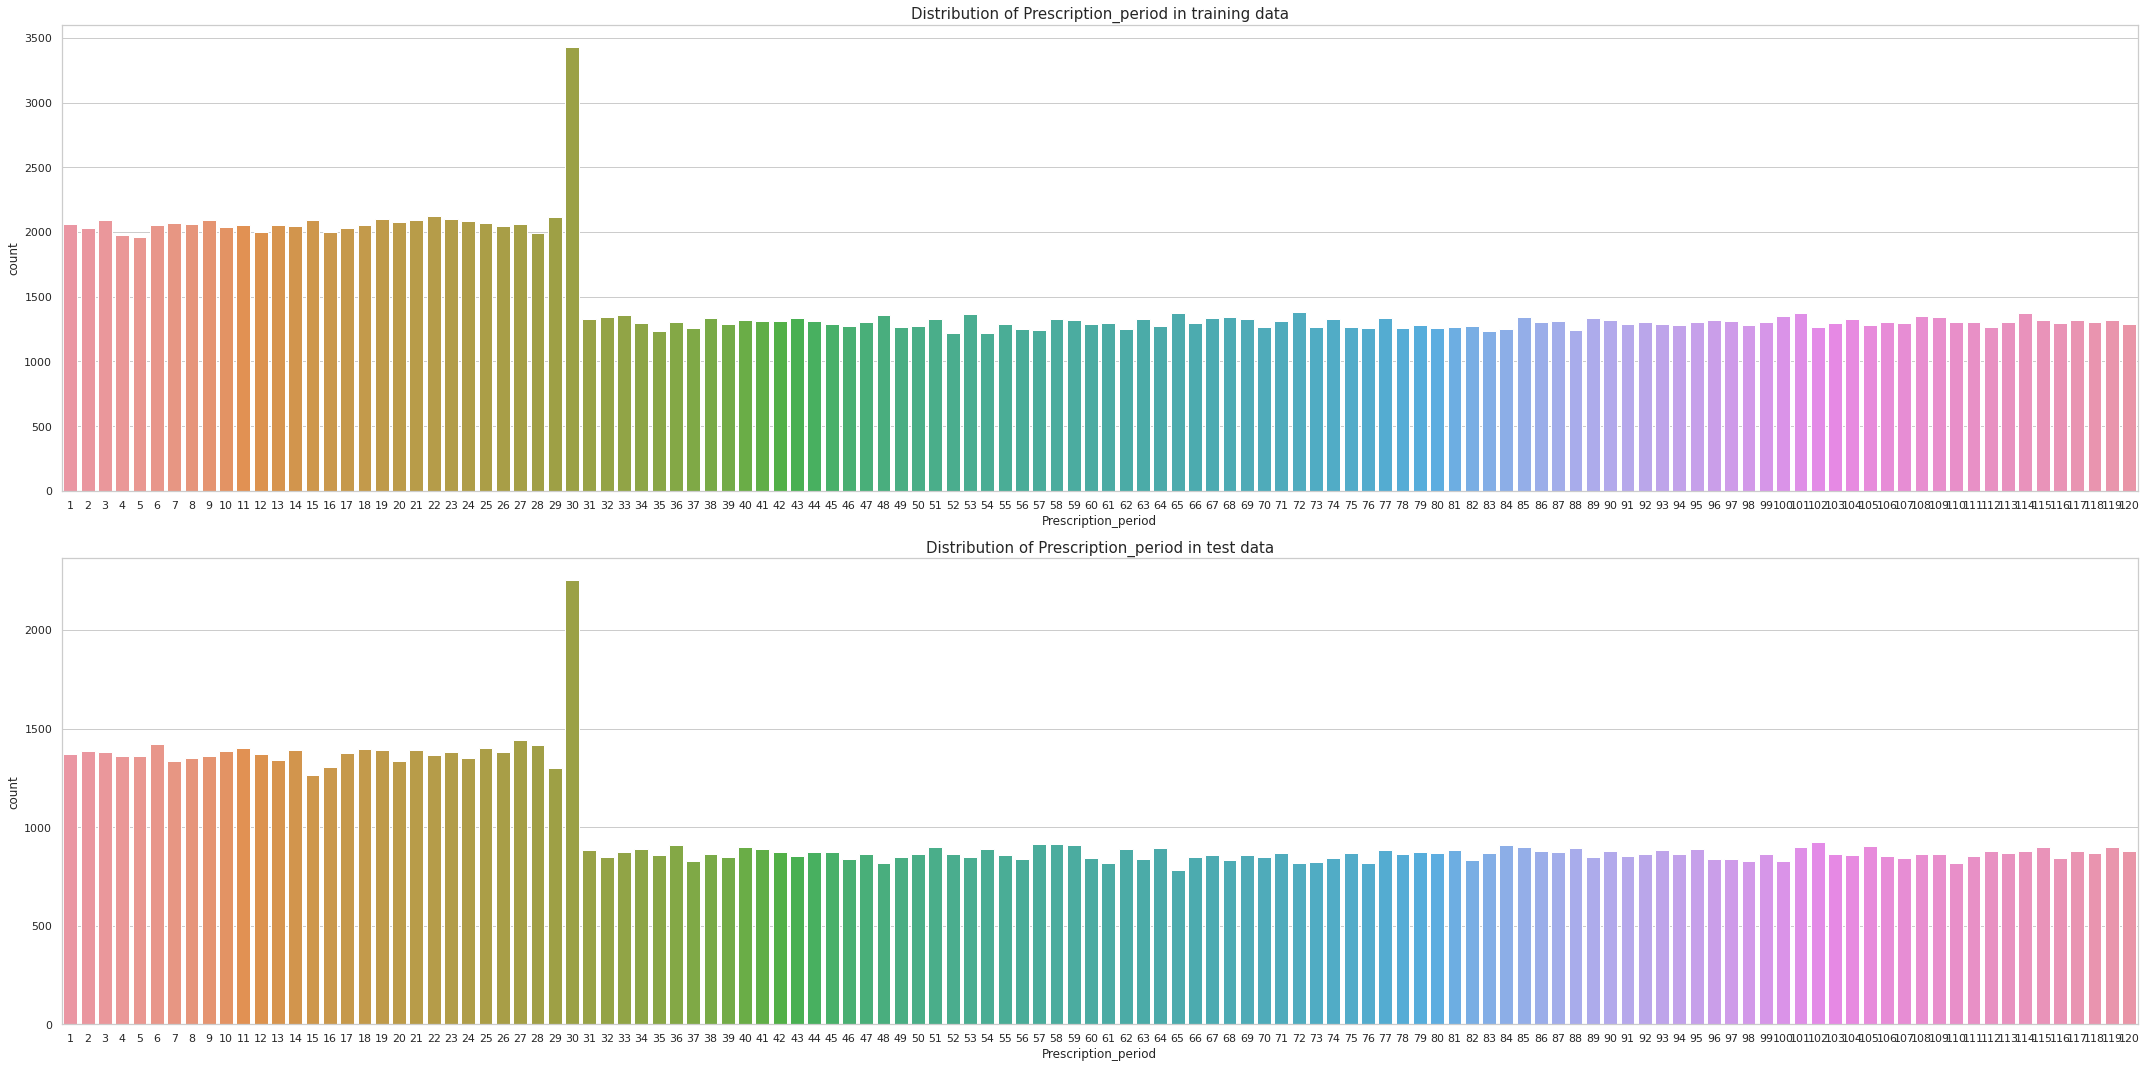

In [9]:
# Checking the distribution of values in Prescription_period feature in training data
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(30, 15), squeeze=True, 
                       gridspec_kw = {'height_ratios':[1,1]})
data = trainDataDF.copy()
axes[0].set_title("Distribution of Prescription_period in training data",fontsize=15)
sns.countplot(data['Prescription_period'], ax=axes[0])

# Checking the distribution of values in Prescription_period feature in training data
data = testDataDF.copy()
axes[1].set_title("Distribution of Prescription_period in test data",fontsize=15)
sns.countplot(data['Prescription_period'], ax=axes[1])

fig.tight_layout()
plt.show()

Both train and test datasets have similar distribution for prescription period.<br>
Majority of patients are prescribed regimens of period 30 days or less.<br>
Almost, half as many patients are prescribed regimens longer than that

### 2.3 Diabetes

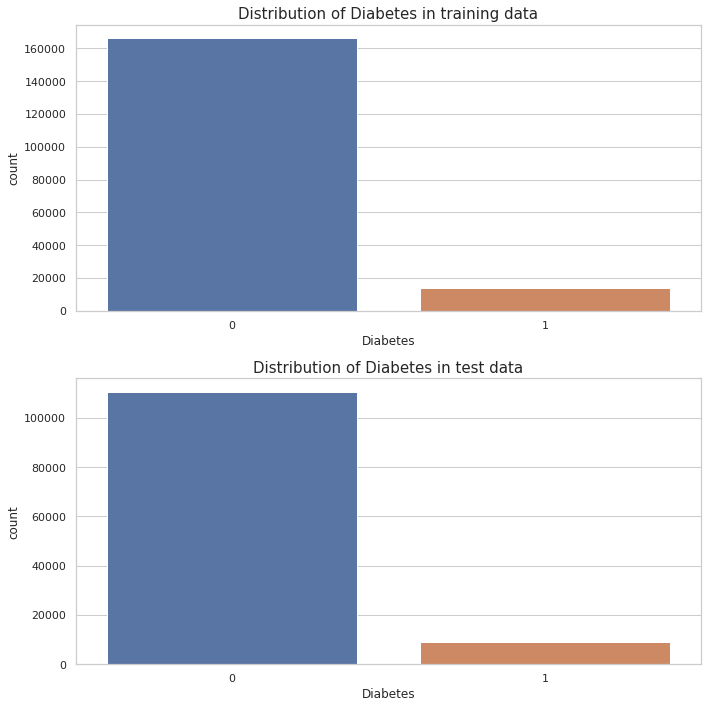

In [10]:
# Checking the distribution of values in Diabetes feature in training data
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), squeeze=True, 
                       gridspec_kw = {'height_ratios':[1,1]})

data = trainDataDF.copy()
axes[0].set_title("Distribution of Diabetes in training data",fontsize=15)
sns.countplot(data['Diabetes'], ax=axes[0])

# Checking the distribution of values in Diabetes feature in training data
data = testDataDF.copy()
axes[1].set_title("Distribution of Diabetes in test data",fontsize=15)
sns.countplot(data['Diabetes'], ax=axes[1])

fig.tight_layout()
plt.show()

Both train and test datasets have similar distribution for diabetic patients.

### 2.4 Smokes

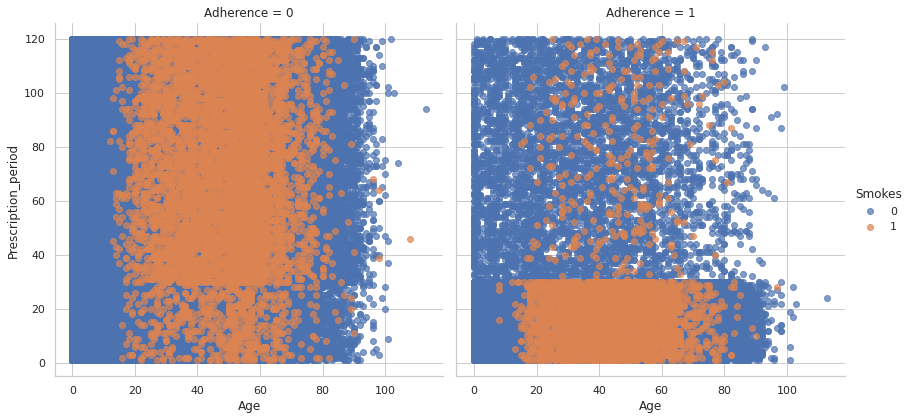

In [11]:
g = sns.FacetGrid(trainDataDF, col="Adherence", hue="Smokes", height=6)
g.map(plt.scatter, "Age", "Prescription_period", alpha=.7)
g.add_legend()

Both train and test datasets have similar distribution for smokers. <br>
Majority of smokers that adhere to their regimens are 30 days and below in length.

### 2.5 Check for overall data distribution

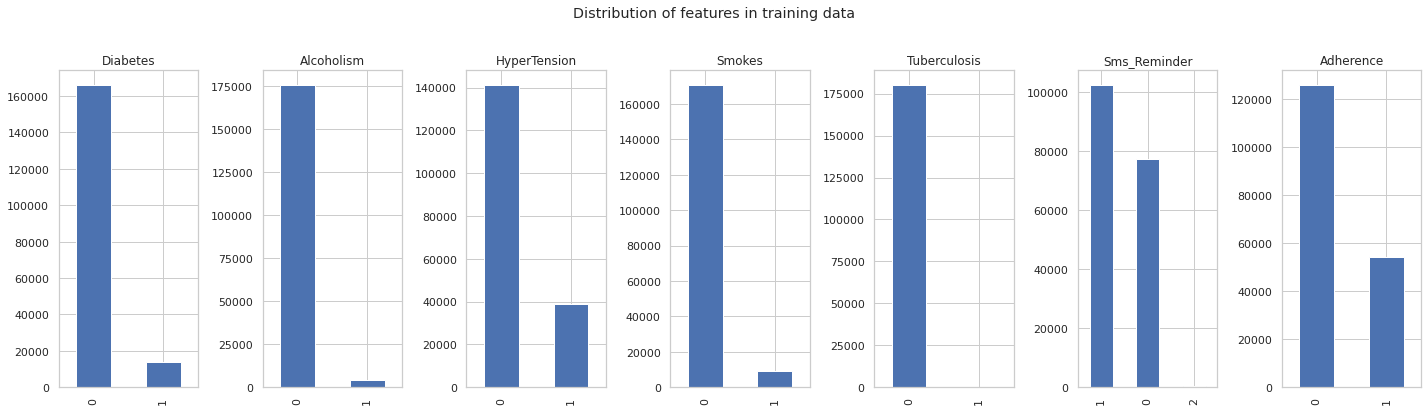

In [12]:
train_categorical_features = ["Diabetes", "Alcoholism", "HyperTension", "Smokes", "Tuberculosis", "Sms_Reminder", "Adherence"]
fig, ax = plt.subplots(1, len(train_categorical_features), figsize=(20,6))
for i, categorical_feature in enumerate(trainDataDF[train_categorical_features]):
  trainDataDF[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)
fig.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.suptitle("Distribution of features in training data")
fig.show()

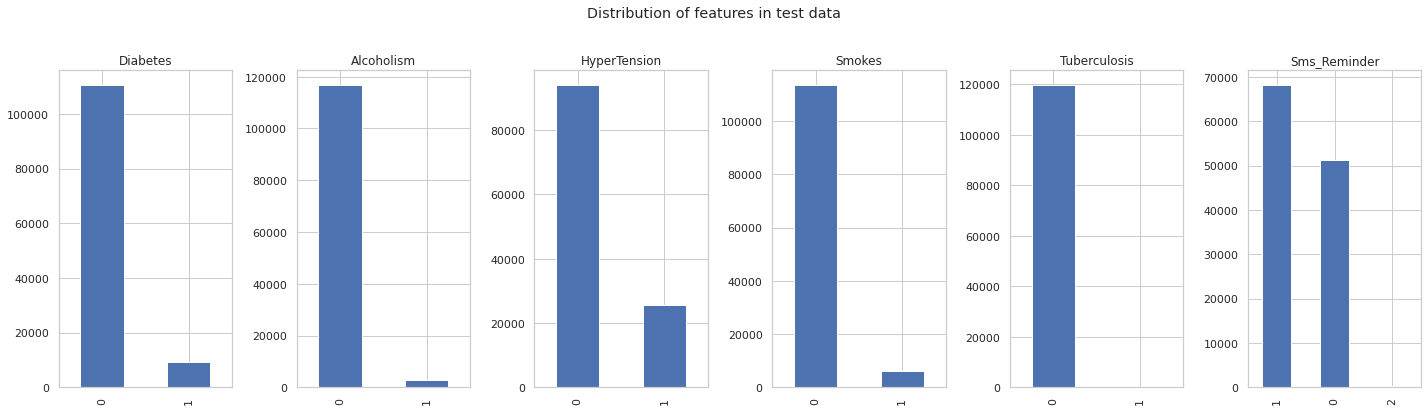

In [13]:
test_categorical_features = ["Diabetes", "Alcoholism", "HyperTension", "Smokes", "Tuberculosis", "Sms_Reminder"]
fig, ax = plt.subplots(1, len(test_categorical_features), figsize=(20,6))
for i, categorical_feature in enumerate(testDataDF[test_categorical_features]):
  testDataDF[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)
fig.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.suptitle("Distribution of features in test data")
fig.show()

Both these graphs clearly demonstrate that train and test datasets follow similar trends for all the features

### 2.6 Bivariate analysis

In this, we will check how the features affect the adherence metric. We have already done something like this in section 2.4 where we checked how smokers tend to adhere to regimens

**NOTE:** We can only do this analysis for training data as we dont have the target variable in the test data

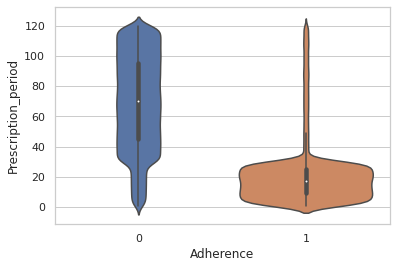

In [14]:
# Since Prescription_period and Age are continuous variable, we check them first
display(sns.violinplot(data = trainDataDF, x='Adherence', y='Prescription_period'))

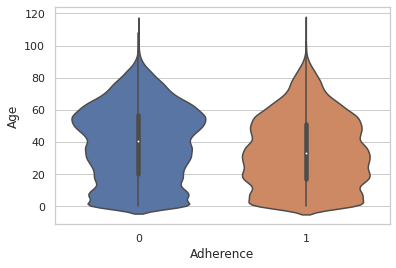

In [15]:
display(sns.violinplot(data = trainDataDF, x='Adherence', y='Age'))

This tells us that there is a higher chances that a patient will get a prescription for 30 days and
below and these patients have high adherence. <br>
Patients with prescrion periods greater than 30 days tend to not adhere<br>
From the violin plot of age, it can be seen that patients under the age of 40 have higher adherence to regimen

**Checking bivariate analysis for all the other categorical columns**

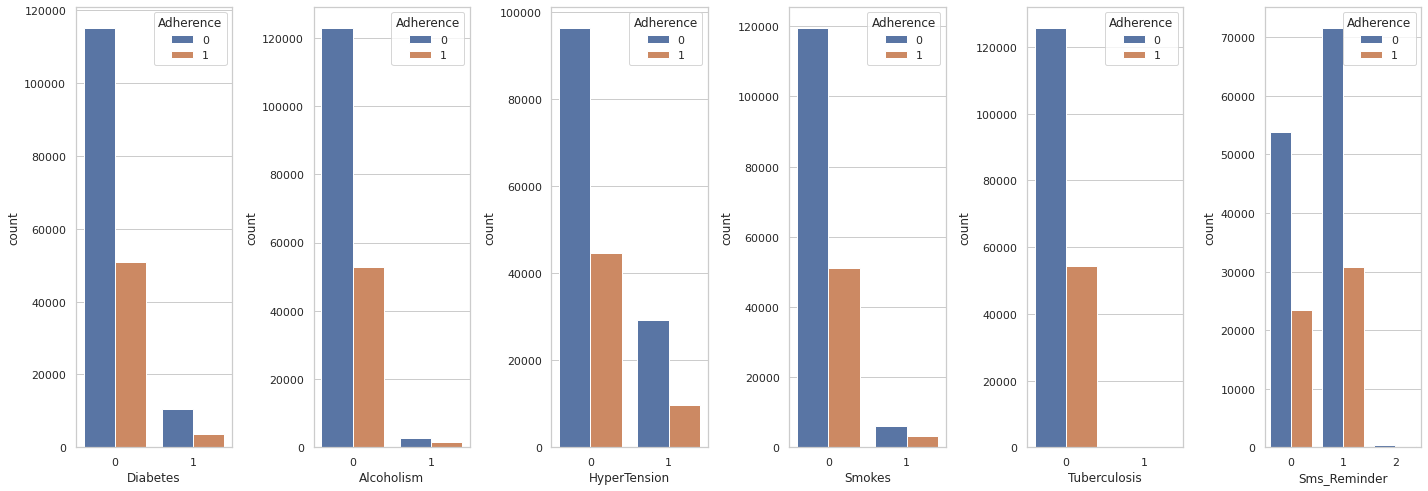

In [16]:
fig, ax = plt.subplots(1, len(test_categorical_features), figsize=(20,7))
for counter, eachFeature in enumerate(test_categorical_features):
  sns.countplot(x=eachFeature, hue="Adherence", data=trainDataDF, ax=ax[counter])
fig.tight_layout()
fig.show()

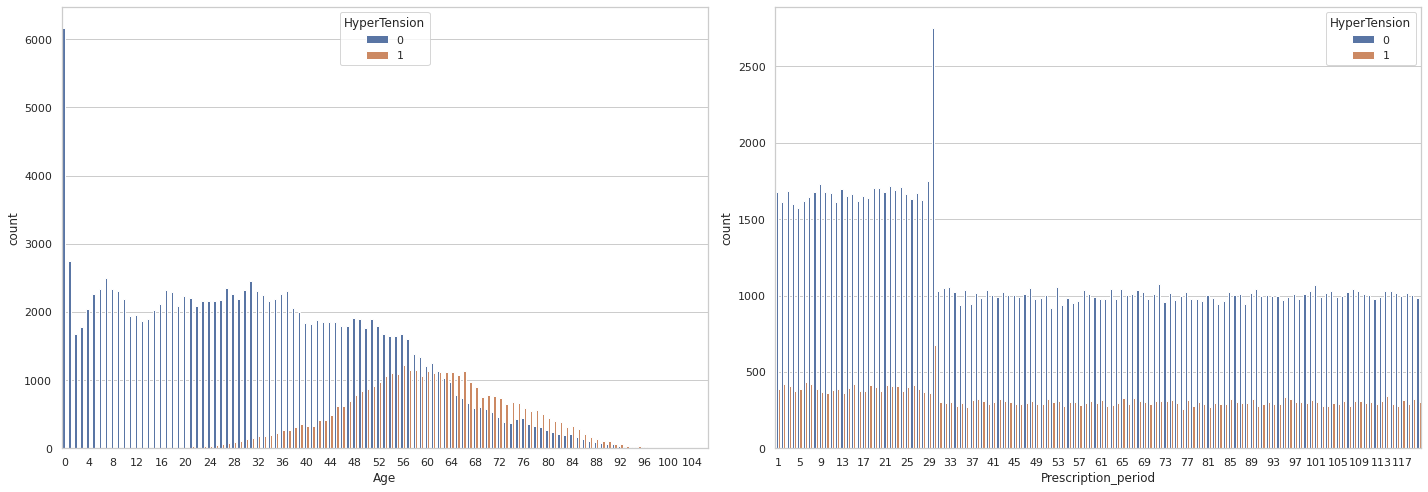

In [17]:
continuous_features = ["Age","Prescription_period"]
fig, ax = plt.subplots(1, len(continuous_features), figsize=(20,7))
for counter, eachFeature in enumerate(continuous_features):
  sns.countplot(x=eachFeature, hue="HyperTension", data=trainDataDF, ax=ax[counter])
  # Show every 4th tick on X axis
  every_nth = 4
  for n, label in enumerate(ax[counter].xaxis.get_ticklabels()):
      if n % every_nth != 0:
          label.set_visible(False)
fig.tight_layout()
fig.show()

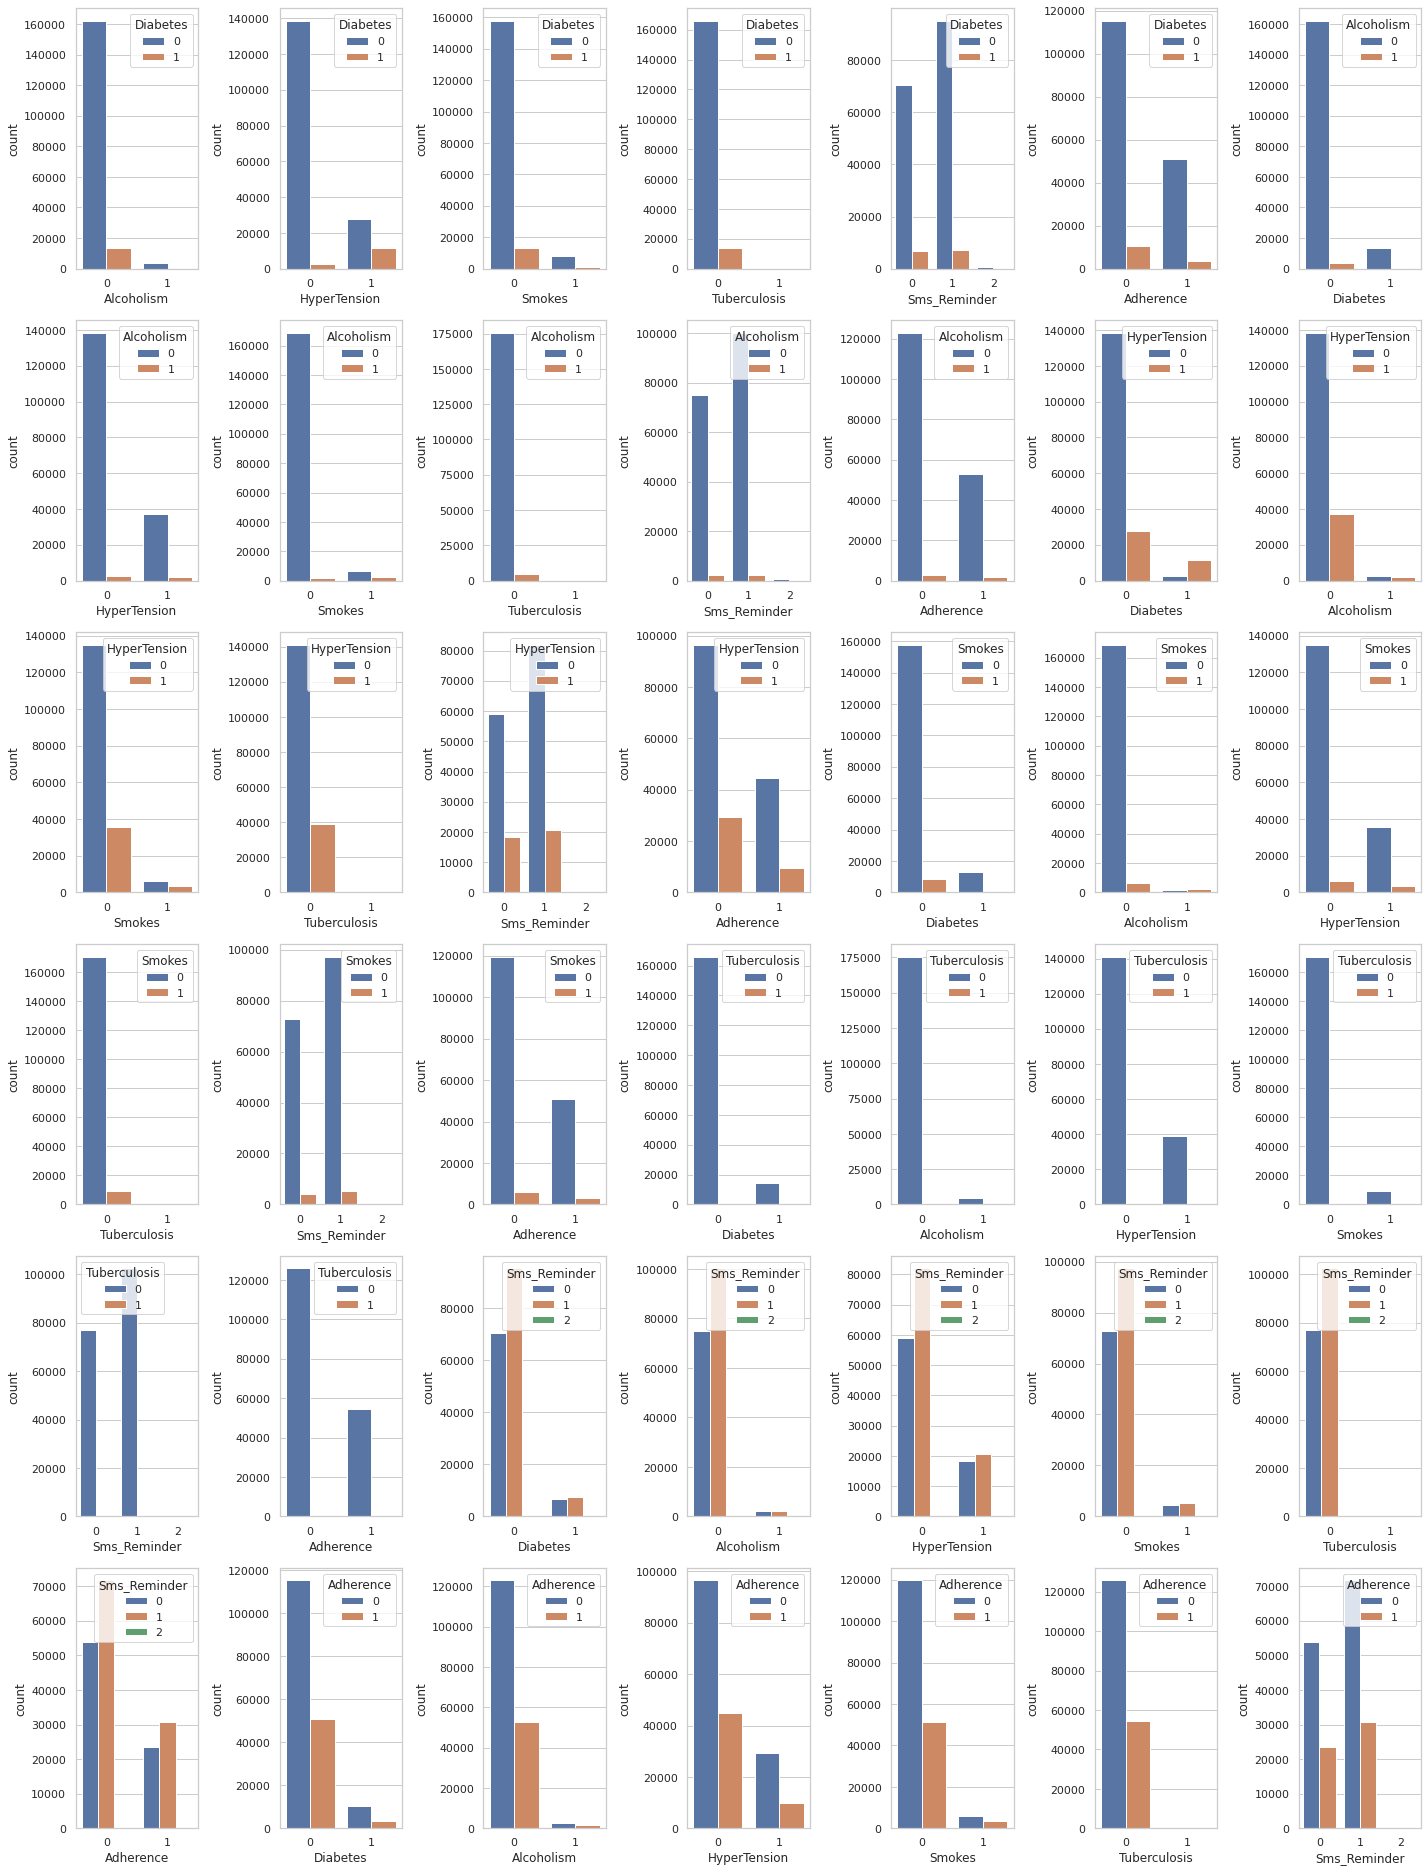

In [18]:
fig = plt.figure(figsize=(20,30))
fig.subplots_adjust(hspace=0.1, wspace=0.3)
featureSetRow = ["Diabetes", "Alcoholism", "HyperTension", "Smokes", "Tuberculosis", "Sms_Reminder", "Adherence"]

featureSetColumn = ["Diabetes", "Alcoholism", "HyperTension", "Smokes", "Tuberculosis", "Sms_Reminder", "Adherence"]
graph_counter = 1
for row_counter, each_feature_row in enumerate(featureSetRow, 1):
  for col_counter, each_feature_column in enumerate(featureSetColumn, 1):
    if each_feature_row != each_feature_column:
      ax = fig.add_subplot(len(featureSetRow), len(featureSetColumn), graph_counter)
      sns.countplot(x=each_feature_column, hue=each_feature_row, data=trainDataDF, ax=ax)
      graph_counter+=1

fig.tight_layout()
plt.show()

### 2.7 Correlation matrix

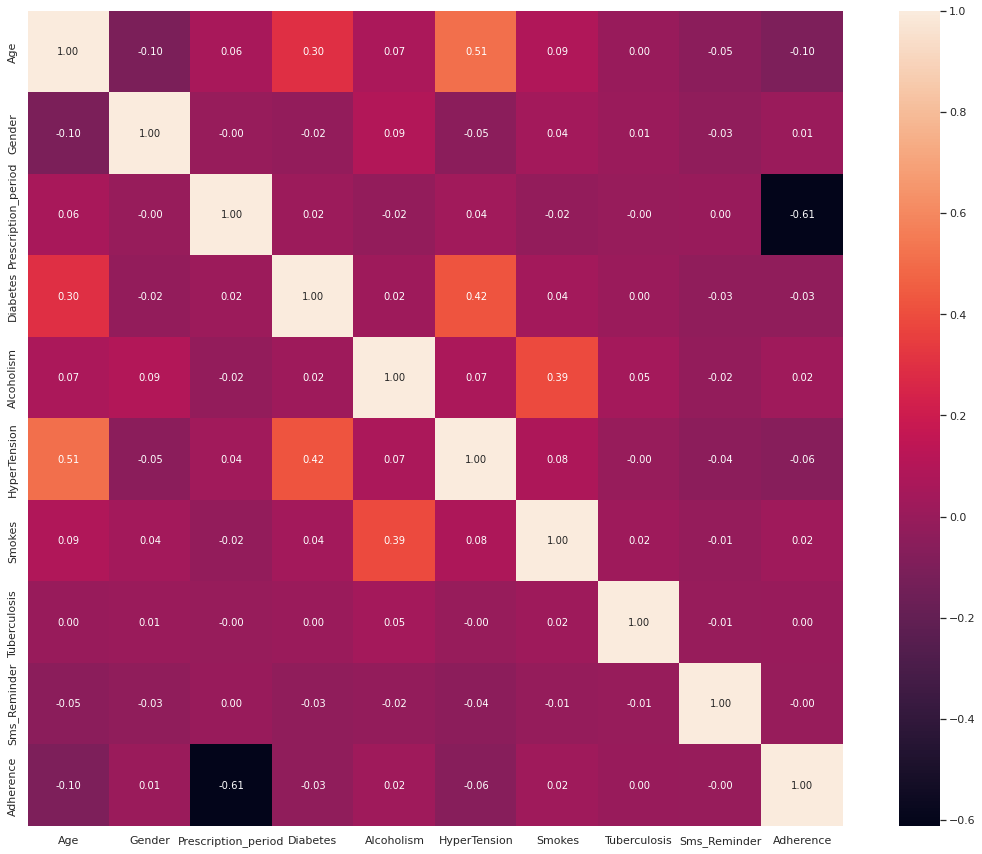

In [19]:
corr_df = trainDataDF.copy()
column_list = ['Age', 'Gender', 'Prescription_period', 'Diabetes', 'Alcoholism', 'HyperTension', 'Smokes', 'Tuberculosis', 'Sms_Reminder', 'Adherence']

plt.subplots(figsize=(20,15))
corr_mat = np.corrcoef(corr_df[column_list].values.T)
sns.set(font_scale=1)
full_mat = sns.heatmap(corr_mat, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size":10}, yticklabels=column_list, xticklabels=column_list)

fig.tight_layout()
plt.show()

**Points to Note:**
1. Adherence and Prescription period have very high inverse correlation meaning if the prescription period is high, adherence will be low
2. Adherence have very slight inverse correlation with age, meaning an older patient will have lower chances of adhering to regimen
3. SMS Reminders do not seem to be affecting adherence in any way
4. There are some strong correlations between various features which was expected. For example, hypertension is highly correlated with age and diabetes, likewise for smoking and alcoholism

## 3 Feature Engineering for modelling

Since the data has similar trends in train and test for all the features, we can say that the training data is a good representation of the test data.

However, there is some imbalance in the distribution of the data for some features. For ex: very few patients have tuberculosis

In [20]:
# Creating bin for Prescription_period
trainDataDF['Prescription_period_bin'] = [0 if x <31 else 1 for x in trainDataDF['Prescription_period']]
testDataDF['Prescription_period_bin'] = [0 if x <31 else 1 for x in testDataDF['Prescription_period']]

In [21]:
# Creating bins for Age
trainDataDF["Age_bin"] = [int(np.floor(x/10)) for x in trainDataDF['Age']]
testDataDF["Age_bin"] = [int(np.floor(x/10)) for x in testDataDF['Age']]

In [22]:
def create_frequency_encoding(trainDf, testDf, featureList, combined=True):
  '''Function to create frequency encoding for columns mentioned in featureList
    --Parameneters
      trainDf: train dataset as pandas df
      testDf: test dataset as pandas df
      featureList: list of features
      combined: Should combine train and test dataset before encoding or not
  '''
  features = [f for f in featureList if f in trainDf.columns]
  for each_feature in features:
    if combined:
      combinedDf = pd.concat([trainDf, testDf])
      freq_dist = (combinedDf.groupby(each_feature).size()) / len(combinedDf)
      new_column_name = "{}_{}_frqEncode".format(str(each_feature), "combined")
    else:
      freq_dist = (trainDf.groupby(each_feature).size()) / len(trainDf)
      new_column_name = "{}_{}_frqEncode".format(str(each_feature), "train")
      trainDf[new_column_name] = trainDf[each_feature].apply(lambda x : freq_dist[x])
      testDf[new_column_name] = testDf[each_feature].apply(lambda x : freq_dist[x])
  return trainDf, testDf
  
def create_onehot_encoding(trainDf, testDf, featuresList, combined=False, sparse=False, dummy_na=True):
  """Function to create one-hot encoding
    --Parameneters
      trainDf : train dataset as pandas df
      testDf : test dataset as pandas df
      featuresList : list of features
      combined : Should combine train and test dataset before encoding or not
      sparse : Should the dummy columns be sparse or not.
      dummy_na : Add a column to indicate NaNs, if False NaNs are ignored
  """
  featuresList = [f for f in featuresList if f in trainDf.columns]
  for column in featuresList:
    print(column)
  if combined:
    categories = pd.concat([trainDf[column], testDf[column]]).dropna().unique()
  else:
    categories = trainDf[column].dropna().unique()
    trainDf[column] = trainDf[column].astype('category', CategoricalDtype(categories=categories))
    testDf[column] = testDf[column].astype('category', CategoricalDtype(categories=categories))
    trainDf = pd.get_dummies(trainDf, columns=featuresList, dummy_na=dummy_na, sparse=sparse)
    testDf = pd.get_dummies(testDf, columns=featuresList, dummy_na=dummy_na, sparse=sparse)
  return trainDf, testDf

In [23]:
freq_dist_column_list = ['Age', 'Gender', 'Prescription_period', 'Diabetes', 'Alcoholism', 'HyperTension', 'Smokes', 'Tuberculosis', 'Sms_Reminder', 'Prescription_period_bin', 'Age_bin']
trainDataDF, testDataDF = create_frequency_encoding(trainDataDF, testDataDF, freq_dist_column_list, combined=True)

In [24]:
# Dropping old age and prescription period features as we have made new bins
trainDataDF.drop(['Age'],axis=1, inplace=True)
trainDataDF.drop(['Prescription_period'],axis=1, inplace=True)
testDataDF.drop(['Age'],axis=1, inplace=True)
testDataDF.drop(['Prescription_period'],axis=1, inplace=True)

In [25]:
column_list = ['Age', 'Gender', 'Prescription_period', 'Diabetes', 'Alcoholism', 'HyperTension', 'Smokes', 'Tuberculosis', 'Sms_Reminder', 'Prescription_period_bin', 'Age_bin']
trainDataDF, testDataDF = create_onehot_encoding(trainDataDF, testDataDF, column_list, combined=True, sparse=False, dummy_na=False)

Gender
Diabetes
Alcoholism
HyperTension
Smokes
Tuberculosis
Sms_Reminder
Prescription_period_bin
Age_bin


## 4. Modelling on imbalanced data

### 4.1 Logistic Regression

In [26]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score

In [27]:
columns = list(trainDataDF.columns)
columns.remove("Adherence")
pdx = trainDataDF[columns]
pdy = trainDataDF['Adherence']
x_train, x_test, y_train, y_test = train_test_split(pdx, pdy, train_size=0.7, random_state=42)
x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)

In [28]:
BASE_logistic_model = sm.Logit(y_train, x_train_new).fit()

Optimization terminated successfully.
         Current function value: 0.301273
         Iterations 7


In [29]:
threshold = 0.4
remove_cols_insig = []
predicted_train = BASE_logistic_model.predict(sm.add_constant(x_train.drop(remove_cols_insig, axis=1)))
y_pred_train = (predicted_train > threshold).astype(int)
threshold = 0.4
predicted_test = BASE_logistic_model.predict(sm.add_constant(x_test.drop(remove_cols_insig, axis=1)))
y_pred_test = (predicted_test > threshold).astype(int)
print("\nLogistic Regression - Train Confusion Matrix\n\n", pd.crosstab(y_train, y_pred_train, rownames = ["Actuall"],colnames = ["Predicted"]))
print("\nLogistic Regression - Train accuracy\n\n",round(accuracy_score(y_train, y_pred_train),3))
print("\nLogistic Regression - Train Classification Report\n", classification_report(y_train, y_pred_train))
print("\n\nLogistic Regression - Test Confusion Matrix\n\n", pd.crosstab(y_test, y_pred_test, rownames = ["Actuall"],colnames = ["Predicted"]))
print("\nLogistic Regression - Test accuracy",round(accuracy_score(y_test, y_pred_test),3))
print("\nLogistic Regression - Test Classification Report\n", classification_report( y_test, y_pred_test))


Logistic Regression - Train Confusion Matrix

 Predicted      0      1
Actuall                
0          78434   9762
1           3680  34272

Logistic Regression - Train accuracy

 0.893

Logistic Regression - Train Classification Report
               precision    recall  f1-score   support

           0       0.96      0.89      0.92     88196
           1       0.78      0.90      0.84     37952

    accuracy                           0.89    126148
   macro avg       0.87      0.90      0.88    126148
weighted avg       0.90      0.89      0.90    126148



Logistic Regression - Test Confusion Matrix

 Predicted      0      1
Actuall                
0          33459   4167
1           1588  14850

Logistic Regression - Test accuracy 0.894

Logistic Regression - Test Classification Report
               precision    recall  f1-score   support

           0       0.95      0.89      0.92     37626
           1       0.78      0.90      0.84     16438

    accuracy                 

### 4.2 Decision Trees

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
BASE_dt_fit = DecisionTreeRegressor(criterion="mse",random_state=42)
BASE_dt_fit.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', random_state=42)

In [32]:
threshold = 0.6
predicted_train = BASE_dt_fit.predict(x_train)
y_pred_train = (predicted_train > threshold).astype(int)
predicted_test = BASE_dt_fit.predict(x_test)
y_pred_test = (predicted_test > threshold).astype(int)
print ("\nDecision Tree - Train Confusion Matrix\n\n", pd.crosstab(y_train, y_pred_train, rownames = ["Actuall"],colnames = ["Predicted"]))
print ("\nDecision Tree - Train accuracy\n\n",round(accuracy_score(y_train, y_pred_train),3))
print ("\nDecision Tree - Train Classification Report\n", classification_report(y_train, y_pred_train))
print ("\n\nDecision Tree - Test Confusion Matrix\n\n", pd.crosstab(y_test, y_pred_test, rownames = ["Actuall"],colnames = ["Predicted"]))
print ("\nDecision Tree - Test accuracy",round(accuracy_score(y_test, y_pred_test),3))
print ("\nDecision Tree - Test Classification Report\n", classification_report(y_test, y_pred_test))


Decision Tree - Train Confusion Matrix

 Predicted      0      1
Actuall                
0          88196      0
1              0  37952

Decision Tree - Train accuracy

 1.0

Decision Tree - Train Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     88196
           1       1.00      1.00      1.00     37952

    accuracy                           1.00    126148
   macro avg       1.00      1.00      1.00    126148
weighted avg       1.00      1.00      1.00    126148



Decision Tree - Test Confusion Matrix

 Predicted      0      1
Actuall                
0          32851   4775
1           4918  11520

Decision Tree - Test accuracy 0.821

Decision Tree - Test Classification Report
               precision    recall  f1-score   support

           0       0.87      0.87      0.87     37626
           1       0.71      0.70      0.70     16438

    accuracy                           0.82     54064
   macro avg 

### 4.3 Random Forest

In [33]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestRegressor

In [34]:
BASE_rf_fit = RandomForestRegressor(n_estimators=50, 
                                    criterion="mse", 
                                    max_depth=5, 
                                    min_samples_split=2, 
                                    bootstrap=True,
                                    max_features='auto',
                                    random_state=42, 
                                    min_samples_leaf=1, 
                                    n_jobs=-1)

BASE_rf_fit.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=5, n_estimators=50, n_jobs=-1,
                      random_state=42)

In [35]:
threshold = 0.6
predicted_train = BASE_rf_fit.predict(x_train)
y_pred_train = (predicted_train > threshold).astype(int)
predicted_test = BASE_rf_fit.predict(x_test)
y_pred_test = (predicted_test > threshold).astype(int)
print ("\nRandom Forest - Train Confusion Matrix\n\n", pd.crosstab(y_train, y_pred_train, rownames = ["Actuall"],colnames = ["Predicted"]))
print ("\nRandom Forest - Train accuracy\n\n",round(accuracy_score(y_train, y_pred_train),3))
print ("\nRandom Forest - Train Classification Report\n", classification_report(y_train, y_pred_train))
print ("\n\nRandom Forest - Test Confusion Matrix\n\n", pd.crosstab(y_test, y_pred_test, rownames = ["Actuall"],colnames = ["Predicted"]))
print ("\nRandom Forest - Test accuracy",round(accuracy_score(y_test, y_pred_test),3))
print ("\nRandom Forest - Test Classification Report\n", classification_report( y_test, y_pred_test))


Random Forest - Train Confusion Matrix

 Predicted      0      1
Actuall                
0          78447   9749
1           3680  34272

Random Forest - Train accuracy

 0.894

Random Forest - Train Classification Report
               precision    recall  f1-score   support

           0       0.96      0.89      0.92     88196
           1       0.78      0.90      0.84     37952

    accuracy                           0.89    126148
   macro avg       0.87      0.90      0.88    126148
weighted avg       0.90      0.89      0.90    126148



Random Forest - Test Confusion Matrix

 Predicted      0      1
Actuall                
0          33457   4169
1           1593  14845

Random Forest - Test accuracy 0.893

Random Forest - Test Classification Report
               precision    recall  f1-score   support

           0       0.95      0.89      0.92     37626
           1       0.78      0.90      0.84     16438

    accuracy                           0.89     54064
   macro av

## 5. Creating balanced data and modelling on balanced data

### 5.1 Balancing the data

In [36]:
# Load a fresh copy of the data
trainFilePath = "/content/drive/MyDrive/Training_Data.csv"
testFilePath = "/content/drive/MyDrive/Test_Data.csv"

trainDataDF = pd.read_csv(trainFilePath)
testDataDF = pd.read_csv(testFilePath)

In [37]:
# converting adherence and gender variables to numerical types
gender_mapping = {"M": 1, "F": 0}
trainDataDF["Gender"] = trainDataDF["Gender"].map(gender_mapping).fillna(-1)
adherence_mapping = {"No": 0, "Yes": 1}
trainDataDF["Adherence"] = trainDataDF["Adherence"].map(adherence_mapping).fillna(-1)
# converting gender variable to numerical types using the same mapping that has been used for training data
testDataDF["Gender"] = testDataDF["Gender"].map(gender_mapping).fillna(-1)

In [38]:
# Balancing the data for age = 0 and 1
zeroAgeDf = trainDataDF[trainDataDF["Age"]==0]
oneAgeDf = trainDataDF[trainDataDF["Age"]==1]
columns = ['patient_id', 'Age', 'Gender', 'Prescription_period', 'Diabetes', 'Alcoholism', 'HyperTension', 'Smokes',
'Tuberculosis', 'Sms_Reminder']

pdx0 = zeroAgeDf[columns]
pdy0 = zeroAgeDf['Adherence']
pdx1 = oneAgeDf[columns]
pdy1 = oneAgeDf['Adherence']
x_train0, x_test0, y_train0, y_test0 = train_test_split(pdx0, pdy0, train_size=0.75, random_state=42)
x_train1, x_test1, y_train1, y_test1 = train_test_split(pdx1, pdy1, train_size=0.35, random_state=42)
x_test0["Adherence"] = y_test0.values
x_test1["Adherence"] = y_test1.values

nonZeroAgeDf = trainDataDF[trainDataDF["Age"]>1]
balancedDf = nonZeroAgeDf.append(x_test0)
balancedDf = balancedDf.append(x_test1)

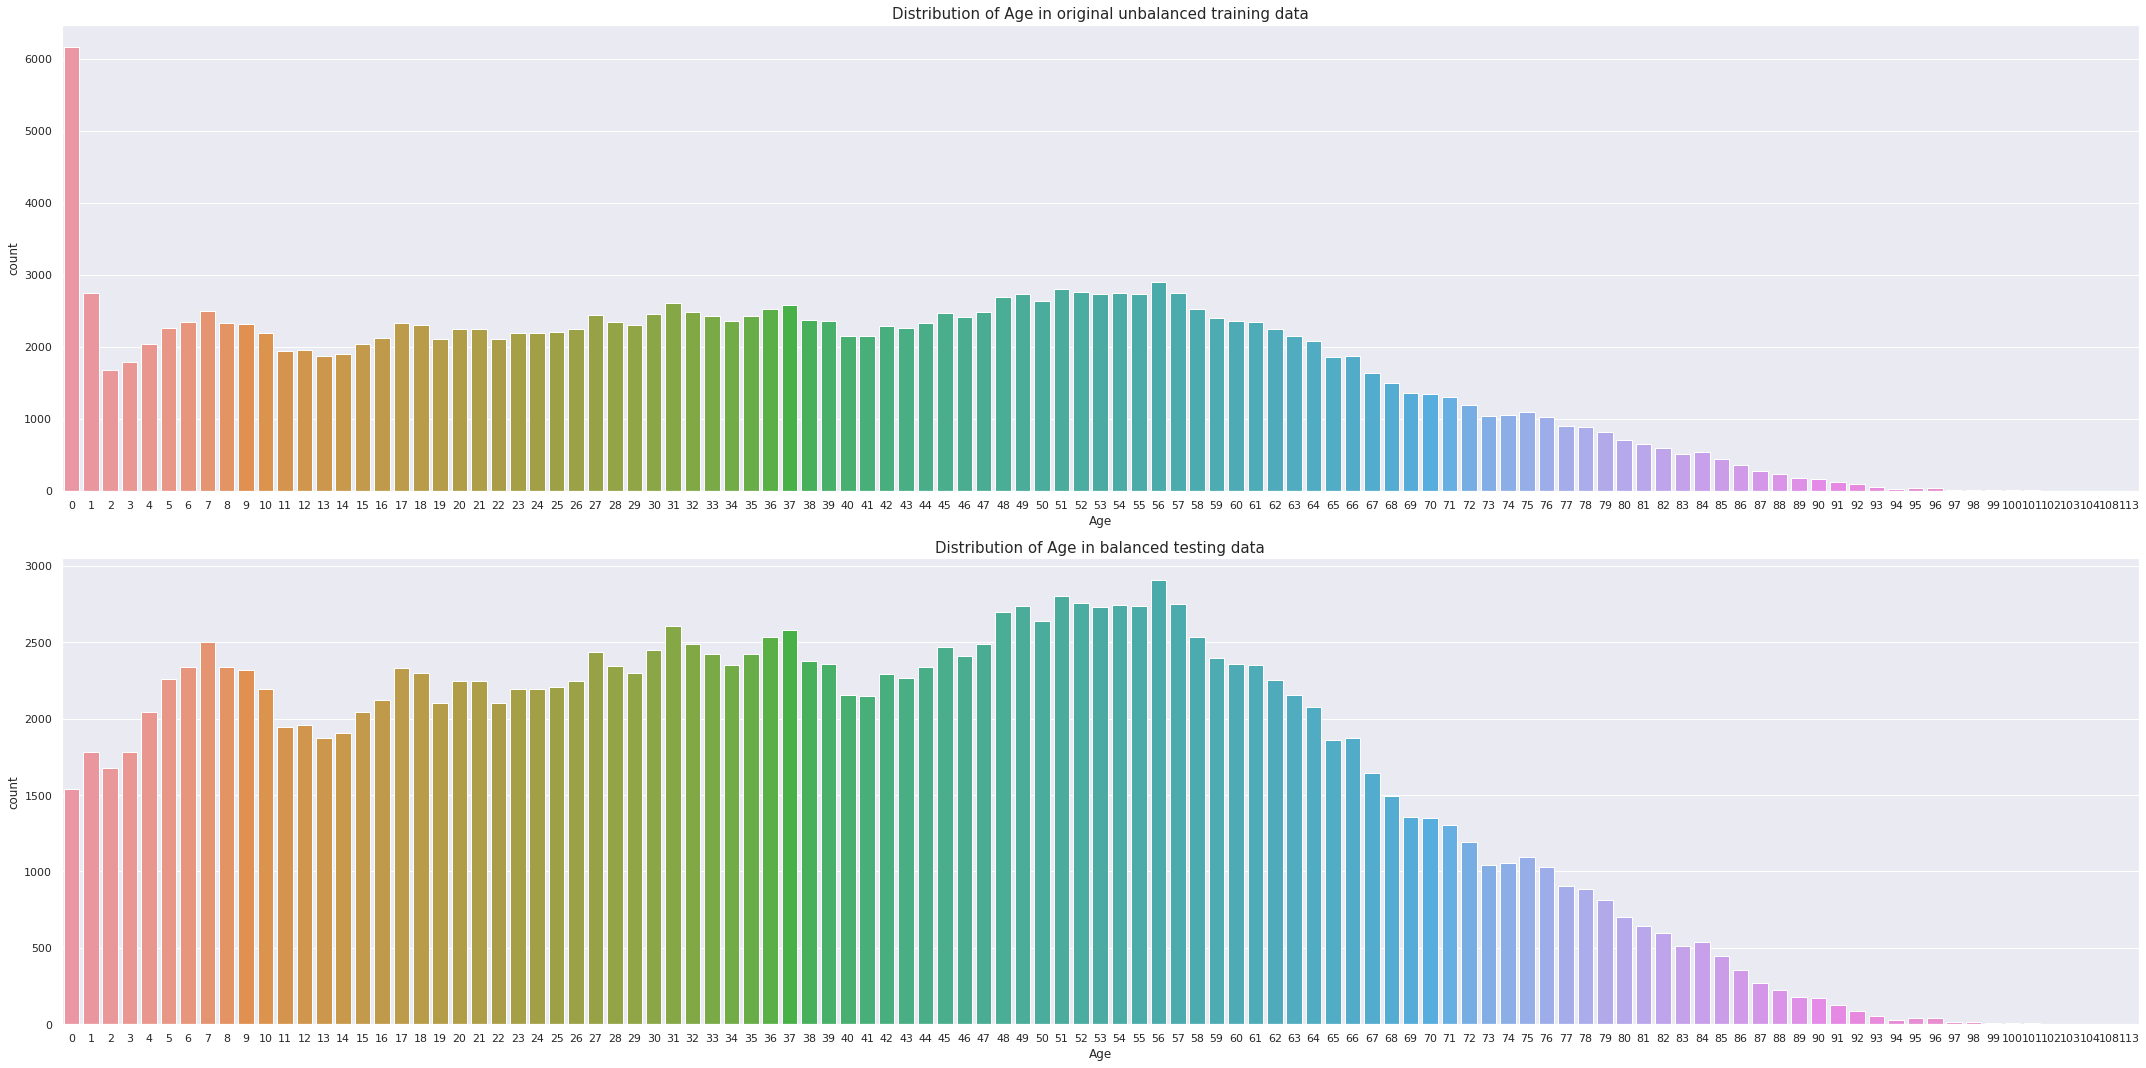

In [39]:
# Checking the distribution of values in Age feature in training data
data = trainDataDF.copy()
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(30, 15), squeeze=True, 
                       gridspec_kw = {'height_ratios':[1,1]})
# plt.figure(figsize=(30,10))
axes[0].set_title("Distribution of Age in original unbalanced training data",fontsize=15)
sns.countplot(data['Age'], ax=axes[0])

# Checking the distribution of values in Age feature in test data
data = balancedDf.copy()
axes[1].set_title("Distribution of Age in balanced testing data",fontsize=15)
sns.countplot(data['Age'], ax=axes[1])

fig.tight_layout()
plt.show()

In [40]:
# Creating bin for Prescription_period
balancedDf['Prescription_period_bin'] = [0 if x <31 else 1 for x in balancedDf['Prescription_period']]
testDataDF['Prescription_period_bin'] = [0 if x <31 else 1 for x in testDataDF['Prescription_period']]

# Creating bins for Age
balancedDf["Age_bin"] = [int(np.floor(x/10)) for x in balancedDf['Age']]
testDataDF["Age_bin"] = [int(np.floor(x/10)) for x in testDataDF['Age']]

In [41]:
freq_dist_column_list = ['Age', 'Gender', 'Prescription_period', 'Diabetes', 'Alcoholism', 'HyperTension', 'Smokes', 'Tuberculosis', 'Sms_Reminder', 'Prescription_period_bin', 'Age_bin']
balancedDf, testDataDF = create_frequency_encoding(balancedDf, testDataDF, freq_dist_column_list, combined=True)

In [42]:
balancedDf.drop(['Age'],axis=1, inplace=True)
balancedDf.drop(['Prescription_period'],axis=1, inplace=True)
testDataDF.drop(['Age'],axis=1, inplace=True)
testDataDF.drop(['Prescription_period'],axis=1, inplace=True)

In [43]:
column_list = ['Age', 'Gender', 'Prescription_period', 'Diabetes', 'Alcoholism', 'HyperTension', 'Smokes', 'Tuberculosis', 'Sms_Reminder', 'Prescription_period_bin', 'Age_bin']
balancedDf, testDataDF = create_onehot_encoding(balancedDf, testDataDF, column_list, combined=True, sparse=False, dummy_na=False)

Gender
Diabetes
Alcoholism
HyperTension
Smokes
Tuberculosis
Sms_Reminder
Prescription_period_bin
Age_bin


### 5.2 Modelling on balanced dataset

In [44]:
columns = list(balancedDf.columns)
columns.remove("Adherence")
pdx = balancedDf[columns]
pdy = balancedDf['Adherence']
bal_x_train, bal_x_test, bal_y_train, bal_y_test = train_test_split(pdx, pdy, train_size=0.7, random_state=42)
# adding constant (creating and intercept variable. If intercept is not created the coeff will change accordingly)
bal_x_train_new = sm.add_constant(bal_x_train)
bal_x_test_new = sm.add_constant(bal_x_test)

### 5.2.1 Logistic Regression

In [45]:
EN_logistic_model = sm.Logit(bal_y_train, bal_x_train_new).fit()

Optimization terminated successfully.
         Current function value: 0.299725
         Iterations 7


In [46]:
threshold = 0.4
remove_cols_insig = []
predicted_train = EN_logistic_model.predict(sm.add_constant(bal_x_train.drop(remove_cols_insig, axis=1)))
y_pred_train = (predicted_train > threshold).astype(int)
threshold = 0.4
predicted_test = EN_logistic_model.predict(sm.add_constant(bal_x_test.drop(remove_cols_insig, axis=1)))
y_pred_test = (predicted_test > threshold).astype(int)
print("\nLogistic Regression - Train Confusion Matrix\n\n", pd.crosstab(bal_y_train, y_pred_train, rownames = ["Actuall"],colnames = ["Predicted"]))
print("\nLogistic Regression - Train accuracy\n\n",round(accuracy_score(bal_y_train, y_pred_train),3))
print("\nLogistic Regression - Train Classification Report\n", classification_report(bal_y_train, y_pred_train))
print("\n\nLogistic Regression - Test Confusion Matrix\n\n", pd.crosstab(bal_y_test, y_pred_test, rownames = ["Actuall"],colnames = ["Predicted"]))
print("\nLogistic Regression - Test accuracy",round(accuracy_score(bal_y_test, y_pred_test),3))
print("\nLogistic Regression - Test Classification Report\n", classification_report( bal_y_test, y_pred_test))


Logistic Regression - Train Confusion Matrix

 Predicted      0      1
Actuall                
0          76095   9396
1           3542  33206

Logistic Regression - Train accuracy

 0.894

Logistic Regression - Train Classification Report
               precision    recall  f1-score   support

           0       0.96      0.89      0.92     85491
           1       0.78      0.90      0.84     36748

    accuracy                           0.89    122239
   macro avg       0.87      0.90      0.88    122239
weighted avg       0.90      0.89      0.90    122239



Logistic Regression - Test Confusion Matrix

 Predicted      0      1
Actuall                
0          32343   4096
1           1571  14379

Logistic Regression - Test accuracy 0.892

Logistic Regression - Test Classification Report
               precision    recall  f1-score   support

           0       0.95      0.89      0.92     36439
           1       0.78      0.90      0.84     15950

    accuracy                 

### 5.2.2 Decision Trees

In [47]:
EN_dt_fit = DecisionTreeRegressor(criterion="mse",random_state=42)
EN_dt_fit.fit(bal_x_train,bal_y_train)

DecisionTreeRegressor(criterion='mse', random_state=42)

In [48]:
threshold = 0.6
predicted_train = EN_dt_fit.predict(bal_x_train)
y_pred_train = (predicted_train > threshold).astype(int)
predicted_test = EN_dt_fit.predict(bal_x_test)
y_pred_test = (predicted_test > threshold).astype(int)
print ("\nDecision Tree - Train Confusion Matrix\n\n", pd.crosstab(bal_y_train, y_pred_train, rownames = ["Actuall"],colnames = ["Predicted"]))
print ("\nDecision Tree - Train accuracy\n\n",round(accuracy_score(bal_y_train, y_pred_train),3))
print ("\nDecision Tree - Train Classification Report\n", classification_report(bal_y_train, y_pred_train))
print ("\n\nDecision Tree - Test Confusion Matrix\n\n", pd.crosstab(bal_y_test, y_pred_test, rownames = ["Actuall"],colnames = ["Predicted"]))
print ("\nDecision Tree - Test accuracy",round(accuracy_score(bal_y_test, y_pred_test),3))
print ("\nDecision Tree - Test Classification Report\n", classification_report( bal_y_test, y_pred_test))


Decision Tree - Train Confusion Matrix

 Predicted      0      1
Actuall                
0          85491      0
1              0  36748

Decision Tree - Train accuracy

 1.0

Decision Tree - Train Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85491
           1       1.00      1.00      1.00     36748

    accuracy                           1.00    122239
   macro avg       1.00      1.00      1.00    122239
weighted avg       1.00      1.00      1.00    122239



Decision Tree - Test Confusion Matrix

 Predicted      0      1
Actuall                
0          31922   4517
1           4685  11265

Decision Tree - Test accuracy 0.824

Decision Tree - Test Classification Report
               precision    recall  f1-score   support

           0       0.87      0.88      0.87     36439
           1       0.71      0.71      0.71     15950

    accuracy                           0.82     52389
   macro avg 

### 5.2.3 Random Forest

In [49]:
# parameters used in random forest are: n_estimators representing the number of individual decision trees used is 5000,
# maximum features selected are auto, which means it will select sqrt(p) for classification and p/3 for regression
# automatically
EN_rf_fit = RandomForestRegressor(n_estimators=50,
                                  criterion="mse", 
                                  max_depth=5, 
                                  min_samples_split=2,
                                  bootstrap=True,
                                  max_features='auto',
                                  random_state=42, 
                                  min_samples_leaf=1, 
                                  n_jobs=-1)
EN_rf_fit.fit(bal_x_train,bal_y_train)

RandomForestRegressor(criterion='mse', max_depth=5, n_estimators=50, n_jobs=-1,
                      random_state=42)

In [50]:
threshold = 0.6
predicted_train = EN_rf_fit.predict(bal_x_train)
y_pred_train = (predicted_train > threshold).astype(int)
predicted_test = EN_rf_fit.predict(bal_x_test)
y_pred_test = (predicted_test > threshold).astype(int)
print ("\nRandom Forest - Train Confusion Matrix\n\n", pd.crosstab(bal_y_train, y_pred_train, rownames = ["Actuall"],colnames = ["Predicted"]))
print ("\nRandom Forest - Train accuracy\n\n",round(accuracy_score(bal_y_train, y_pred_train),3))
print ("\nRandom Forest - Train Classification Report\n", classification_report(bal_y_train, y_pred_train))
print ("\n\nRandom Forest - Test Confusion Matrix\n\n", pd.crosstab(bal_y_test, y_pred_test, rownames = ["Actuall"],colnames = ["Predicted"]))
print ("\nRandom Forest - Test accuracy",round(accuracy_score(bal_y_test, y_pred_test),3))
print ("\nRandom Forest - Test Classification Report\n", classification_report( bal_y_test, y_pred_test))


Random Forest - Train Confusion Matrix

 Predicted      0      1
Actuall                
0          76104   9387
1           3546  33202

Random Forest - Train accuracy

 0.894

Random Forest - Train Classification Report
               precision    recall  f1-score   support

           0       0.96      0.89      0.92     85491
           1       0.78      0.90      0.84     36748

    accuracy                           0.89    122239
   macro avg       0.87      0.90      0.88    122239
weighted avg       0.90      0.89      0.90    122239



Random Forest - Test Confusion Matrix

 Predicted      0      1
Actuall                
0          32345   4094
1           1576  14374

Random Forest - Test accuracy 0.892

Random Forest - Test Classification Report
               precision    recall  f1-score   support

           0       0.95      0.89      0.92     36439
           1       0.78      0.90      0.84     15950

    accuracy                           0.89     52389
   macro av

## 6 Ensemble model

In [51]:
# Joining both unbalanced and balanced test sets to create an ensemble
x_test = x_test.append(bal_x_test)
y_test = y_test.append(bal_y_test)

# Removing the duplicate values
x_test = x_test[~x_test.index.duplicated()]
y_test = y_test[~y_test.index.duplicated()]

In [52]:
remove_cols_insig = []
# threshold = 0.6
BASE_predicted_test1 = BASE_logistic_model.predict(sm.add_constant(x_test.drop(remove_cols_insig, axis=1)))
BASE_dt_x_test_output = BASE_dt_fit.predict(x_test)
BASE_rf_x_test_output = BASE_rf_fit.predict(x_test)
EN_predicted_test1 = EN_logistic_model.predict(sm.add_constant(x_test.drop(remove_cols_insig, axis=1)))
EN_dt_x_test_output = EN_dt_fit.predict(x_test)
EN_rf_x_test_output = EN_rf_fit.predict(x_test)

In [53]:
all_output_DF = pd.DataFrame()
all_output_DF['patient_id'] = x_test['patient_id']
all_output_DF["base_LogReg"] = BASE_predicted_test1.values.tolist()
all_output_DF["base_DecTree"] = list(BASE_dt_x_test_output)
all_output_DF["base_RF"] = list(BASE_rf_x_test_output)
all_output_DF["En_LogReg"] = EN_predicted_test1.values.tolist()
all_output_DF["En_DecTree"] = list(EN_dt_x_test_output)
all_output_DF["En_RF"] = list(EN_rf_x_test_output)
all_output_DF["Actual_y"] = y_test.values.tolist()

### 6.1 Stochastic Gradient Boosting Classification

In [54]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor

In [55]:
columns = list(all_output_DF.columns)
columns.remove('Actual_y')
gdx = all_output_DF[columns]
gdy = all_output_DF['Actual_y']
x_train_gb, x_test_gb, y_train_gb, y_test_gb = train_test_split(gdx, gdy, train_size=0.7, random_state=42)

In [56]:
seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
ensemble_model = GradientBoostingRegressor(loss="huber", n_estimators=num_trees, random_state=seed)
ensemble_model.fit(x_train_gb.values, y_train_gb.values)

GradientBoostingRegressor(loss='huber', random_state=7)

In [57]:
ensemble_train_out = ensemble_model.predict(x_train_gb.values)
ensemble_test_out = ensemble_model.predict(x_test_gb.values)

In [58]:
threshold_list = [0.5, 0.6, 0.7, 0.8]
for threshold in threshold_list:
  print("---------------------------------------------------------------")
  print("THRESHOLD: ", threshold)
  ensemble_output_final_train = (ensemble_train_out > threshold).astype(int)
  ensemble_output_final_test = (ensemble_test_out > threshold).astype(int)
  print ("\nEnsemble - Train Confusion Matrix\n\n", pd.crosstab(y_train_gb, ensemble_output_final_train, rownames = ["Actuall"],colnames = ["Predicted"]))
  print ("\nEnsemble - Train accuracy\n\n",round(accuracy_score(y_train_gb, ensemble_output_final_train),3))
  print ("\nEnsemble - Train Classification Report\n", classification_report(y_train_gb, ensemble_output_final_train))
  print ("\n\nEnsemble - Test Confusion Matrix\n\n", pd.crosstab(y_test_gb, ensemble_output_final_test, rownames = ["Actuall"],colnames = ["Predicted"]))
  print ("\nEnsemble - Test accuracy",round(accuracy_score(y_test_gb, ensemble_output_final_test),3))
  print ("\nEnsemble - Test Classification Report\n", classification_report( y_test_gb, ensemble_output_final_test))

---------------------------------------------------------------
THRESHOLD:  0.5

Ensemble - Train Confusion Matrix

 Predicted      0      1
Actuall                
0          40103   3918
1           2222  17184

Ensemble - Train accuracy

 0.903

Ensemble - Train Classification Report
               precision    recall  f1-score   support

           0       0.95      0.91      0.93     44021
           1       0.81      0.89      0.85     19406

    accuracy                           0.90     63427
   macro avg       0.88      0.90      0.89     63427
weighted avg       0.91      0.90      0.90     63427



Ensemble - Test Confusion Matrix

 Predicted      0     1
Actuall               
0          17354  1645
1            954  7231

Ensemble - Test accuracy 0.904

Ensemble - Test Classification Report
               precision    recall  f1-score   support

           0       0.95      0.91      0.93     18999
           1       0.81      0.88      0.85      8185

    accuracy       

### Since the ensemble has maximum accuracy for threshold = 0.6, we use that

In [59]:
threshold_list = [0.6]
for threshold in threshold_list:
  print("---------------------------------------------------------------")
  print("THRESHOLD: ", threshold)
  ensemble_output_final_train = (ensemble_train_out > threshold).astype(int)
  ensemble_output_final_test = (ensemble_test_out > threshold).astype(int)
  print ("\nEnsemble - Train Confusion Matrix\n\n", pd.crosstab(y_train_gb, ensemble_output_final_train, rownames = ["Actuall"],colnames = ["Predicted"]))
  print ("\nEnsemble - Train accuracy\n\n",round(accuracy_score(y_train_gb, ensemble_output_final_train),3))
  print ("\nEnsemble - Train Classification Report\n", classification_report(y_train_gb, ensemble_output_final_train))
  print ("\n\nEnsemble - Test Confusion Matrix\n\n", pd.crosstab(y_test_gb, ensemble_output_final_test, rownames = ["Actuall"],colnames = ["Predicted"]))
  print ("\nEnsemble - Test accuracy",round(accuracy_score(y_test_gb, ensemble_output_final_test),3))
  print ("\nEnsemble - Test Classification Report\n", classification_report( y_test_gb, ensemble_output_final_test))

---------------------------------------------------------------
THRESHOLD:  0.6

Ensemble - Train Confusion Matrix

 Predicted      0      1
Actuall                
0          40134   3887
1           2257  17149

Ensemble - Train accuracy

 0.903

Ensemble - Train Classification Report
               precision    recall  f1-score   support

           0       0.95      0.91      0.93     44021
           1       0.82      0.88      0.85     19406

    accuracy                           0.90     63427
   macro avg       0.88      0.90      0.89     63427
weighted avg       0.91      0.90      0.90     63427



Ensemble - Test Confusion Matrix

 Predicted      0     1
Actuall               
0          17362  1637
1            966  7219

Ensemble - Test accuracy 0.904

Ensemble - Test Classification Report
               precision    recall  f1-score   support

           0       0.95      0.91      0.93     18999
           1       0.82      0.88      0.85      8185

    accuracy       

### 6.2 Final Ensemble

In [60]:
def make_prediction_with_ensemble(dataset):
  '''Function to predict output on a dataset
  ---Parameters:
  dataset: test dataset in pandas dataframe
  '''
  # Separate patient_id column from data
  x_test = dataset.copy()
  remove_cols_insig = []
  final_output_df = pd.DataFrame(columns=["patient_id", "adherence", "probablity score"])
  final_output_df["patient_id"] = x_test["patient_id"].values.tolist()
  # Run stage 1 predictions
  BASE_predicted_test1 = BASE_logistic_model.predict(sm.add_constant(x_test.drop(remove_cols_insig, axis=1)))
  BASE_dt_x_test_output = BASE_dt_fit.predict(x_test)
  BASE_rf_x_test_output = BASE_rf_fit.predict(x_test)
  EN_predicted_test1 = EN_logistic_model.predict(sm.add_constant(x_test.drop(remove_cols_insig, axis=1)))
  EN_dt_x_test_output = EN_dt_fit.predict(x_test)
  EN_rf_x_test_output = EN_rf_fit.predict(x_test)

  # Consolidate all predictions for ensemble model
  stage1_output_DF = pd.DataFrame()
  stage1_output_DF['patient_id'] = x_test['patient_id']
  stage1_output_DF["base_LogReg"] = BASE_predicted_test1.values.tolist()
  stage1_output_DF["base_DecTree"] = list(BASE_dt_x_test_output)
  stage1_output_DF["base_RF"] = list(BASE_rf_x_test_output)
  stage1_output_DF["En_LogReg"] = EN_predicted_test1.values.tolist()
  stage1_output_DF["En_DecTree"] = list(EN_dt_x_test_output)
  stage1_output_DF["En_RF"] = list(EN_rf_x_test_output)
  # Run ensemble model
  ensemble_conf_output = ensemble_model.predict(stage1_output_DF.values)
  # Prepare output
  final_output_df["adherence"] = np.array(["yes" if x > 0.6 else "no" for x in ensemble_conf_output])
  final_output_df["probablity score"] = np.around(np.array(ensemble_conf_output), decimals = 2)
  return final_output_df

In [61]:
# Running end to end prediction on train data subset for checking
output_final = make_prediction_with_ensemble(pdx)
output_for_accuracy = pd.DataFrame()
output_for_accuracy["Adherence"] = [0 if x == "no" else 1 for x in output_final["adherence"]]
output_for_accuracy = pd.Series(output_for_accuracy["Adherence"])
print ("\nEnsemble - Train Confusion Matrix\n\n", pd.crosstab(pdy, output_for_accuracy.values, rownames = ["Actuall"],colnames = ["Predicted"]))
print ("\nEnsemble - Train accuracy",round(accuracy_score(pdy, output_for_accuracy),3))
print ("\nEnsemble - Train Classification Report\n", classification_report( pdy, output_for_accuracy))


Ensemble - Train Confusion Matrix

 Predicted       0      1
Actuall                 
0          116518   5412
1            5569  47129

Ensemble - Train accuracy 0.937

Ensemble - Train Classification Report
               precision    recall  f1-score   support

           0       0.95      0.96      0.95    121930
           1       0.90      0.89      0.90     52698

    accuracy                           0.94    174628
   macro avg       0.93      0.92      0.93    174628
weighted avg       0.94      0.94      0.94    174628



In [62]:
output_final = make_prediction_with_ensemble(testDataDF)